# Neural Networks

Neural networks are the workhorse of modern machine learning algorithms. They are based on how a human brain works and operates. They utilise statistics and derivative mathematics to discover the relationship between inputs and outputs. In this Jupyter Notebook we will explore some of the underlying principles behind how neural networks work and slowly unfold some of the complex mathematics that underpins them.

### Neural Network Topology

## Feed Forward

Before going in depth into how neural networks work, it is important to understand the concept of 'feed forward' in the context of neural networks. To help explain the concept of feed forward, we will use the previous 'students' dataset to find the relationship between exam score 1, 2, and whether they will pass or fail.

In [416]:
from keras.models import Sequential
from keras.layers import Dense
import keras.utils

Like before, we will import the dataset. This time though, we will convert the 'y' field into two categories. This essentially makes two new columns 'Fail' and 'Pass', so when 'y' was previously a 0 this will now correspond to a 1 in the 'Fail' column.

In [417]:
# Admission data: 
# - exam 1 score (x1) 
# - exam 2 score (x2)
# - admitted (y)
data = np.loadtxt('/aiuoa/datasets/students_1.txt', delimiter=',')

In [418]:
# Separate features (x1, x2) from target (y)
X, y = np.hsplit(data, np.array([2]))
y = keras.utils.to_categorical(y)
y_shape = np.asarray(y).shape[1]

Below we train a simple categorical neural network on the data given above utilising the sigmoid function that was showcased when looking at the logistic regression example. ![](images/sigmoid.png)

In [425]:
model = Sequential()
# Output layer
model.add(Dense(2, activation='sigmoid', input_dim=2))

# Output layer
model.add(Dense(2, activation='sigmoid'))

# For a binary classification problem
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10
100/100 [==============================] - 1s 7ms/step - loss: 0.6590 - acc: 0.6000
Epoch 2/10
100/100 [==============================] - 0s 75us/step - loss: 0.6581 - acc: 0.6150
Epoch 3/10
100/100 [==============================] - 0s 61us/step - loss: 0.6573 - acc: 0.6150
Epoch 4/10
100/100 [==============================] - 0s 66us/step - loss: 0.6572 - acc: 0.6150
Epoch 5/10
100/100 [==============================] - 0s 60us/step - loss: 0.6569 - acc: 0.6200
Epoch 6/10
100/100 [==============================] - 0s 65us/step - loss: 0.6568 - acc: 0.6200
Epoch 7/10
100/100 [==============================] - 0s 73us/step - loss: 0.6567 - acc: 0.6200
Epoch 8/10
100/100 [==============================] - 0s 57us/step - loss: 0.6566 - acc: 0.6200
Epoch 9/10
100/100 [==============================] - 0s 58us/step - loss: 0.6563 - acc: 0.6200
Epoch 10/10
100/100 [==============================] - 0s 62us/step - loss: 0.6561 - acc: 0.6200


This model now has weights between each layer given by:

In [420]:
model.get_weights()

[array([[-0.03594821,  0.03599847],
        [-0.0253594 ,  0.02541241]], dtype=float32),
 array([ 3.3147871, -3.3217144], dtype=float32)]

In [421]:
# Get layer size.
layer_size = []
for layer in model.layers:
    layer_size.append(int(layer.get_output_at(0).shape[1]))
layer_size.pop()
print(layer_size)

[]


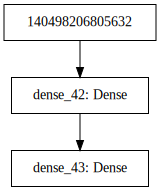

In [426]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

Finally we can visualise the neural network using the VisualizeNN script.

In [423]:
import VisualizeNN as VisNN

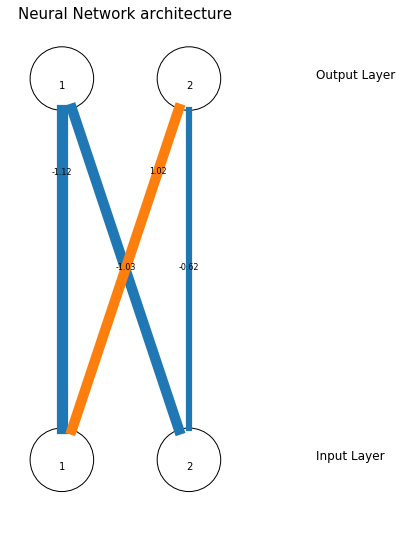

In [427]:
# Draw the Neural Network with weights
network_structure = np.hstack(([X.shape[1]], y_shape))
weights = []
for i in range(0, len(model.get_weights())):
    if "bias" not in model.weights[i].name:
        weights.append(model.get_weights()[i])
network = VisNN.DrawNN(network_structure, weights)
network.draw()

In [429]:
# Draw the Neural Network with weights
network_structure = np.hstack(([X.shape[1]], np.asarray(layer_size), y_shape))
weights = []
for i in range(0, len(model.get_weights())):
    if "bias" not in model.weights[i].name:
        weights.append(model.get_weights()[i])
network = VisNN.DrawNN(network_structure, weights)
network.draw()

TypeError: 'numpy.float64' object cannot be interpreted as an integer

In [ ]:
test = np.array([[25, 30]])
print(model.predict_classes(test))